In [309]:
%matplotlib notebook
import math
from random import seed
from random import sample
import numpy as np
from numpy import linalg as la
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Part 1: Data Preprocessing 

In [24]:
aapl = pd.read_csv('AAPL.csv')
adbe = pd.read_csv('ADBE.csv')
v = pd.read_csv('V.csv')
csco = pd.read_csv('CSCO.csv')
fb = pd.read_csv('FB.csv')
goog = pd.read_csv('GOOG.csv')
intc = pd.read_csv('INTC.csv')
msft = pd.read_csv('MSFT.csv')
nvda = pd.read_csv('NVDA.csv')
orcl = pd.read_csv('ORCL.csv')
ma = pd.read_csv('MA.csv')

In [30]:
y = aapl['Adj Close']
x = pd.DataFrame(None, columns = ['adbe','v','csco','fb','goog','intc','msft','nvda','orcl','ma'])
x.iloc[:,0] = adbe['Adj Close']
x.iloc[:,1] = v['Adj Close']
x.iloc[:,2] = csco['Adj Close']
x.iloc[:,3] = fb['Adj Close']
x.iloc[:,4] = goog['Adj Close']
x.iloc[:,5] = intc['Adj Close']
x.iloc[:,6] = msft['Adj Close']
x.iloc[:,7] = nvda['Adj Close']
x.iloc[:,8] = orcl['Adj Close']
x.iloc[:,9] = ma['Adj Close']

,adbe,v,csco,fb,goog,intc,msft,nvda,orcl,ma
0,108.449997,81.041321,28.704660,128.770004,772.559998,34.592896,54.040600,67.628853,36.990757,99.837997
1,108.389999,80.914185,28.567970,128.190002,776.429993,34.482670,53.871212,67.480682,36.876911,99.191200
2,108.800003,81.520576,28.786673,128.470001,776.469971,34.896019,54.247665,67.411499,37.142555,100.536285
3,108.559998,81.530365,28.686436,128.740005,776.859985,34.969509,54.341782,66.532173,36.876911,101.066460
4,108.639999,81.060890,28.677320,128.990005,775.080017,34.997066,54.398243,66.048050,36.867386,100.389023
5,109.239998,81.295624,28.677320,130.240005,785.940002,34.923580,54.624126,66.295052,36.781670,100.781731
6,107.370003,80.239319,28.285482,128.880005,783.070007,34.234653,53.824150,65.336678,36.200703,99.505394
7,108.050003,80.444717,27.647598,129.050003,786.140015,34.106064,53.748856,65.633095,36.238808,99.515198
8,108.010002,80.073059,27.492685,127.820000,778.190002,33.959095,53.570038,64.566040,36.219753,98.818130
9,107.839996,80.640327,27.501799,127.879997,778.530029,34.399998,54.040600,65.198357,36.581669,99.043945


In [73]:
y

0      106.937210
1      107.393410
2      107.440933
3      108.239250
4      108.400818
5      110.292084
6      110.529694
7      111.518074
8      111.175941
9      111.793686
10     111.717659
11     111.641632
12     111.309006
13     111.251968
14     110.814804
15     111.812714
16     112.382919
17     109.854904
18     108.799980
19     108.077698
20     107.906609
21     105.958328
22     106.053360
23     104.916626
24     103.970886
25     105.470665
26     106.091583
27     105.919640
28     102.967880
29     103.579254
          ...    
771    245.841919
772    248.304520
773    242.561752
774    242.531845
775    248.015381
776    255.054260
777    256.729218
778    256.360352
779    256.470001
780    259.429993
781    260.140015
782    262.200012
783    261.959991
784    264.470001
785    262.640015
786    265.760010
787    267.100006
788    266.290009
789    263.190002
790    262.010010
791    261.779999
792    266.369995
793    264.290009
794    267.839996
795    267

## Data Set Description: 
## The explanatory variables X are 10 different companies' stock prices from 10/1/2016 till 12/7/2019 where the companies are Adobe, Visa, Cisco, Facebook, Google, Intel, Microsoft, Nvidia, Oracle, MasterCard. The target variable Y is Apple's stock price from 10/1/2016 till 12/7/2019

## The 11 stocks I picked are all the biggest technology companies in United States. Therefore, I believe the target variable, Apple's stock price, should not only be positively relative to the other 10 explanatory variables, 10 other companies' stock price, but also highly relative.

In [47]:
print('the mean of each features:\n',x.mean(),"\n")
print('the standard deviation of each features:\n',x.std(),"\n")
print('the mean of target variable:\n',y.mean(),"\n")
print('the standard deviation of target variable:\n',y.std())

the mean of each features:
 adbe     208.554470
v        126.089925
csco      40.004011
fb       165.563458
goog    1045.893032
intc      43.383062
msft      94.702345
nvda     175.715828
orcl      47.414836
ma       181.565398
dtype: float64 

the standard deviation of each features:
 adbe     64.305307
v        32.212256
csco      8.929435
fb       23.155421
goog    147.705755
intc      7.710501
msft     27.273056
nvda     53.780677
orcl      5.382646
ma       58.251977
dtype: float64 

the mean of target variable:
 171.4809788389513 

the standard deviation of target variable:
 36.61106408443346


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [74]:
print('The correlation between x and y:\n',x_train.corrwith(y_train).sort_values(ascending = False))

The correlation between x and y:
 goog    0.916671
msft    0.907923
v       0.902282
ma      0.892130
adbe    0.890577
intc    0.817018
orcl    0.814110
csco    0.774530
fb      0.727142
nvda    0.661127
dtype: float64


In [75]:
print('The three largest correlation between x and y:\n',x_train.corrwith(y_train).sort_values(ascending = False)[0:3])

The three largest correlation between x and y:
 goog    0.916671
msft    0.907923
v       0.902282
dtype: float64


<IPython.core.display.Javascript object>


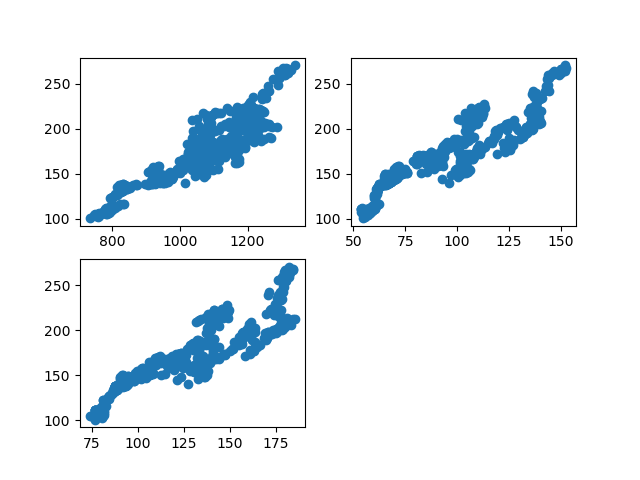

In [76]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.scatter(x_train.loc[:,['goog']],y_train)
ax2.scatter(x_train.loc[:,['msft']],y_train)
ax3.scatter(x_train.loc[:,['v']],y_train)

## Interpretation of the results: We can see from the result that Google, Microsoft and Visa three companies' stock price are extremely highly relative ( r > 0.9 ) to Apple's stock price. Even the 7 other stock prices are still positively and quite highly relative ( 0.9 > r > 0.6 ) to Apply's stock price. The result accord with the statement I mention above. 

# Part 2: Kernel Ridge Regression (KRR) with radial kernel

In [105]:
seed(1)
m = [i for i in range(640)]
list1 = np.array(sample(m,100))
list2 = np.array(sample(m,100))

In [123]:
D = np.zeros(10000)
for i in range(100):
    for j in range(100):
        D[i*100+j] = math.sqrt((list1[i]-list2[j])**2)

<IPython.core.display.Javascript object>


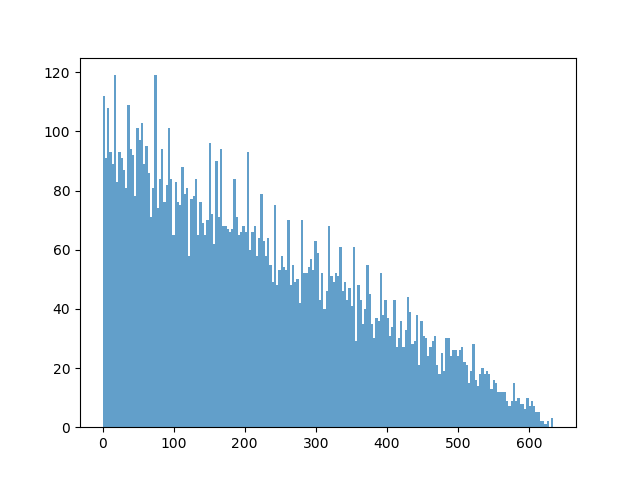

(array([ 112.,   91.,  108.,   93.,   89.,  119.,   83.,   93.,   91.,
          87.,   81.,  109.,   94.,   92.,   78.,  101.,   97.,  103.,
          89.,   95.,   86.,   71.,   81.,  119.,   74.,   84.,   94.,
          76.,   82.,  101.,   84.,   65.,   83.,   76.,   75.,   88.,
          79.,   81.,   58.,   77.,   78.,   84.,   65.,   76.,   69.,
          65.,   70.,   96.,   72.,   62.,   90.,   71.,   94.,   68.,
          68.,   67.,   66.,   67.,   84.,   71.,   65.,   66.,   68.,
          66.,   93.,   60.,   66.,   68.,   58.,   64.,   79.,   63.,
          58.,   64.,   55.,   49.,   75.,   48.,   53.,   58.,   54.,
          53.,   70.,   48.,   55.,   49.,   50.,   42.,   70.,   52.,
          52.,   54.,   57.,   53.,   63.,   59.,   43.,   52.,   40.,
          46.,   68.,   51.,   49.,   52.,   51.,   61.,   46.,   49.,
          43.,   47.,   41.,   61.,   29.,   48.,   43.,   35.,   40.,
          55.,   45.,   35.,   30.,   37.,   36.,   52.,   38.,   43.,
      

In [141]:
plt.hist(D,bins=200,alpha=0.7)

In [146]:
Df = pd.DataFrame(D)
print('The 10% quantile of the 10000 numbers Dij, q =\n',Df.quantile(0.1))

The 10% quantile of the 10000 numbers Dij, q =
 0    33.0
Name: 0.1, dtype: float64


In [147]:
gamma = 1/33

In [159]:
def k(x,y):
    return math.exp(-gamma*(la.norm(x-y))**2)

In [169]:
G = np.zeros(shape=(640,640))
for i in range(640):
    for j in range(640):
        G[i,j] = k(x_train.iloc[i,:],x_train.iloc[j,:])

In [197]:
print('The matrix G:\n',G)

The matrix G:
 [[  1.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    2.69959412e-222   2.57647345e-232   4.63925681e-003]
 [  0.00000000e+000   1.00000000e+000   6.91911350e-067 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   6.91911350e-067   1.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 ..., 
 [  2.69959412e-222   0.00000000e+000   0.00000000e+000 ...,
    1.00000000e+000   1.25435168e-147   1.32739301e-200]
 [  2.57647345e-232   0.00000000e+000   0.00000000e+000 ...,
    1.25435168e-147   1.00000000e+000   3.51963041e-236]
 [  4.63925681e-003   0.00000000e+000   0.00000000e+000 ...,
    1.32739301e-200   3.51963041e-236   1.00000000e+000]]


In [198]:
w, v = la.eig(G)
evalue = -np.sort(-w)
print('The Eigenvalues:\n',evalue)

The Eigenvalues:
 [ 4.60860744  3.87279974  3.86821079  3.71949289  3.25876332  3.13753785
  3.06999819  3.00495458  3.00072411  2.92156286  2.8602002   2.8430312
  2.84167708  2.75032811  2.73880775  2.7211478   2.68429481  2.6771784
  2.64865745  2.63954631  2.5981095   2.59012853  2.5483576   2.47714785
  2.43429556  2.42814468  2.40067255  2.39411156  2.34541973  2.27666244
  2.24119467  2.21315559  2.20357771  2.19032418  2.14962896  2.13301669
  2.11030964  2.07855821  2.06593897  2.05448643  2.05230474  2.03619395
  2.01824163  1.98605711  1.93864434  1.905316    1.90429729  1.88373874
  1.875781    1.86391393  1.85391132  1.84177685  1.82046278  1.81839389
  1.81407432  1.81254813  1.79820912  1.79582116  1.78373838  1.780894
  1.77684251  1.7708396   1.7645523   1.75592337  1.75245848  1.7400634
  1.73869687  1.71048303  1.69511048  1.6807862   1.67843636  1.67829004
  1.6763023   1.67261742  1.66405599  1.65425477  1.65000364  1.64787653
  1.63955604  1.62218487  1.62200862  

<IPython.core.display.Javascript object>


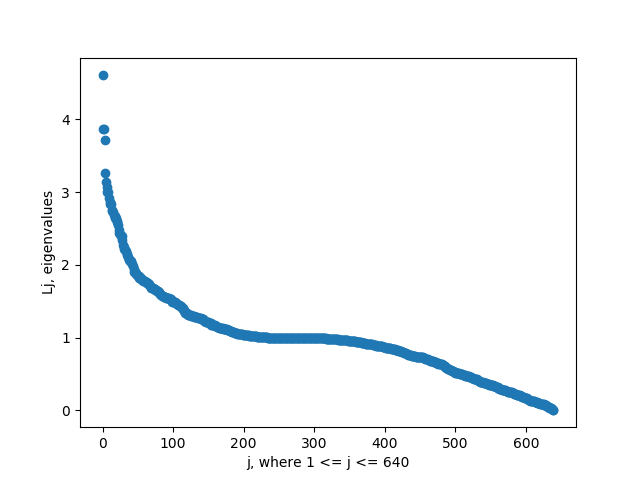

In [457]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(m,evalue)
ax.set_xlabel('j, where 1 <= j <= 640')
ax.set_ylabel('Lj, eigenvalues')

In [211]:
total = 0
rat = np.zeros(640)
temp = 0
for i in range(640):
    total += evalue[i]
for i in range(640):
    temp += evalue[i]
    rat[i] = temp/total

<IPython.core.display.Javascript object>


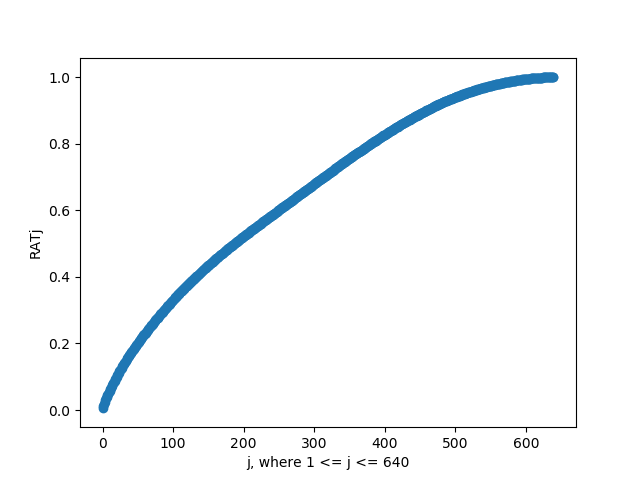

In [480]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(m,rat)
ax.set_xlabel('j, where 1 <= j <= 640')
ax.set_ylabel('RATj')

In [219]:
i = 0
while rat[i] < 0.95:
    i += 1
landa = evalue[i]

In [220]:
landa

0.48436164573685037

In [221]:
M = G + landa*np.identity(640)

In [224]:
inv(M)

array([[  6.94063272e-001,   3.93403720e-129,  -2.88372304e-148, ...,
         -1.70059437e-068,   3.48929419e-104,  -1.76966787e-003],
       [  3.93403720e-129,   7.18913468e-001,   4.63633173e-021, ...,
          3.29483888e-146,   1.20145197e-185,  -1.16729875e-127],
       [ -2.88372304e-148,   4.63633173e-021,   9.25764792e-001, ...,
         -2.41517868e-165,  -8.80686822e-205,   8.55651872e-147],
       ..., 
       [ -1.70059437e-068,   3.29483888e-146,  -2.41517868e-165, ...,
          6.74439230e-001,   1.15234003e-043,   3.01306242e-067],
       [  3.48929419e-104,   1.20145197e-185,  -8.80686822e-205, ...,
          1.15234003e-043,   6.83848414e-001,  -6.18222722e-103],
       [ -1.76966787e-003,  -1.16729875e-127,   8.55651872e-147, ...,
          3.01306242e-067,  -6.18222722e-103,   1.15232706e+000]])

In [227]:
A = np.matmul(y_train, inv(M))

In [242]:
def pred(x):
    z = 0
    for i in range(640):
        z += A[i]*k(x,x_train.iloc[i,:])
    return z

In [266]:
se_train = 0
for i in range(640):
    se_train += (y_train.iloc[i] - pred(x_train.iloc[i,:]))**2
rmse_train = math.sqrt(se_train/640)
print('The value of RMSE on Training set:\n',rmse_train)

The value of RMSE on Training set:
 45.22863666283901


In [250]:
se_test = 0
for i in range(161):
    se_test += (y_test.iloc[i] - pred(x_test.iloc[i,:]))**2
rmse_test = math.sqrt(se_test/161)
print('The value of RMSE on Test set:\n',rmse_test)

The value of RMSE on Test set:
 125.46384798276284


In [252]:
avy = y_train.mean()
avy

172.6282920234376

In [267]:
print('The relative RMSE ratio of Training set:\n',rmse_train/avy)
print('The relative RMSE ratio of Test set:\n',rmse_test/avy)

The relative RMSE ratio of Training set:
 0.2620001399115873
The relative RMSE ratio of Test set:
 0.7267861282305261


## Interpretation of the result: I didn't get a good result by these lambda ( 0.4844 ) and gamma ( 0.03 ) cause the RMSE ratio on Training and Test set are 0.26 and 0.72. But fortunatly that it is reasonable cause Train RMSE > Test RMSE. I will improve the result on the following procedures. 

# Part 3: Improving the results through step by step tuning

In [272]:
def svc_param_selection(X, y):
    alphas = [0.0001,0.0005,0.001,0.01]
    gammas = [0.00001,0.0001,0.001,0.01]
    param_grid = {'gamma': gammas, 'alpha' : alphas}
    grid_search = GridSearchCV(KernelRidge(kernel='rbf'), param_grid, cv=10)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [273]:
svc_param_selection(x_train,y_train)

{'alpha': 0.0005, 'gamma': 0.0001}

## After this procedure, I know I might need to reduce my gamma and lambda to get a better performance.

## First try to reduce gamma to 0.001 and lambda to 0.01

In [268]:
def k1(x,y):
    return math.exp(-0.001*(la.norm(x-y))**2)
G1 = np.zeros(shape=(640,640))
for i in range(640):
    for j in range(640):
        G1[i,j] = k1(x_train.iloc[i,:],x_train.iloc[j,:])
M1 = G1 + 0.01*np.identity(640)
A1 = np.matmul(y_train, inv(M1))
def pred1(x):
    z = 0
    for i in range(640):
        z += A1[i]*k1(x,x_train.iloc[i,:])
    return z
se_train1 = 0
for i in range(640):
    se_train1 += (y_train.iloc[i] - pred1(x_train.iloc[i,:]))**2
rmse_train1 = math.sqrt(se_train1/640)
print('The value of improved RMSE on Training set:\n',rmse_train1)
se_test1 = 0
for i in range(161):
    se_test1 += (y_test.iloc[i] - pred1(x_test.iloc[i,:]))**2
rmse_test1 = math.sqrt(se_test1/161)
print('The value of improved RMSE on Test set:\n',rmse_test1)
print('The improved relative RMSE ratio of Training set:\n',rmse_train1/avy)
print('The improved relative RMSE ratio of Test set:\n',rmse_test1/avy)

The value of improved RMSE on Training set:
 1.3649566887356401
The value of improved RMSE on Test set:
 7.320301145761815
The improved relative RMSE ratio of Training set:
 0.007906911855157097
The improved relative RMSE ratio of Test set:
 0.0424049908619147


## We can see from the reslt that my direction are right cause the ratios are extremely reduce. Then I want to see if it get better to continue reduce gamma and lambda.

## Secondly try to reduce gamma to 0.0001 and lambda to 0.0005

In [371]:
def k2(x,y):
    return math.exp(-0.0001*(la.norm(x-y))**2)
G2 = np.zeros(shape=(640,640))
for i in range(640):
    for j in range(640):
        G2[i,j] = k2(x_train.iloc[i,:],x_train.iloc[j,:])
M2 = G2 + 0.0005*np.identity(640)
A2 = np.matmul(y_train, inv(M2))
def pred2(x):
    z = 0
    for i in range(640):
        z += A2[i]*k2(x,x_train.iloc[i,:])
    return z
se_train2 = 0
for i in range(640):
    se_train2 += (y_train.iloc[i] - pred2(x_train.iloc[i,:]))**2
rmse_train2 = math.sqrt(se_train2/640)
print('The value of secondly improved RMSE on Training set:\n',rmse_train2)
se_test2 = 0
for i in range(161):
    se_test2 += (y_test.iloc[i] - pred2(x_test.iloc[i,:]))**2
rmse_test2 = math.sqrt(se_test2/161)
print('The value of secondly improved RMSE on Test set:\n',rmse_test2)
print('The secondly improved relative RMSE ratio of Training set:\n',rmse_train2/avy)
print('The secondly improved relative RMSE ratio of Test set:\n',rmse_test2/avy)

The value of secondly improved RMSE on Training set:
 1.740854776545378
The value of secondly improved RMSE on Test set:
 2.6372177172970366
The secondly improved relative RMSE ratio of Training set:
 0.010084411750473806
The secondly improved relative RMSE ratio of Test set:
 0.0152768569183259


## Although Training set RMSE ratio increase from 0.008 to 0.01, we get a much better Test set RMSE ratio which improve from 0.042 to 0.015. Therefore, I decide to fix the parameters gamma = 0.0001 and lambda = 0.0005

In [275]:
se_compair = np.zeros(161)
for i in range(161):
    se_compair[i] = (y_test.iloc[i] - pred2(x_test.iloc[i,:]))**2

In [303]:
se = pd.DataFrame(se_compair,columns=['A'])
se.sort_values(ascending = False, by = ['A'])

,A
95,162.407465
43,104.978962
6,71.711419
115,50.820433
33,43.793346
124,41.451653
32,38.598946
105,37.343639
19,35.294368
56,29.520096


In [459]:
print('The 10 cases in the TEST set for which the squared prediction error is the largest:\n',
      se.index[se['A'] > 29].tolist())

The 10 cases in the TEST set for which the squared prediction error is the largest:
 [6, 19, 32, 33, 43, 56, 95, 105, 115, 124]


In [327]:
largest10error = x_test.iloc[[6, 19, 32, 33, 43, 56, 95, 105, 115, 124],:]
std = pd.DataFrame(preprocessing.scale(largest10error))
std

,0,1,2,3,4,5,6,7,8,9
0,-0.805077,-0.725379,-0.466752,0.703868,-0.335862,-0.544784,-0.729348,2.044264,-0.873728,-0.593405
1,-0.943174,-0.899288,-1.257556,0.877227,-0.422015,-0.107358,-0.931705,0.986847,-0.454968,-0.936983
2,1.249307,1.767607,0.834948,1.142971,2.011791,1.626609,1.762097,0.276278,2.565411,1.818016
3,0.584988,0.216263,0.759395,-1.330242,0.331687,0.447006,0.343750,-0.875382,-0.635170,0.092196
4,0.436426,0.160284,0.565121,-0.941679,0.141412,0.897227,0.161633,-0.856463,-0.154838,0.166440
5,-1.729437,-1.352575,-1.623341,0.364216,-1.749053,-2.331645,-1.462709,-0.622564,-0.226342,-1.361948
6,0.372496,0.015910,0.265541,-1.144927,-0.569742,-0.117722,0.033982,0.231177,-0.917948,-0.027865
7,0.510593,0.197871,0.760806,-1.371000,-0.163558,0.457933,0.267525,-0.885236,-0.362034,0.174016
8,-1.047600,-0.995638,-1.205519,0.800058,-0.580445,-0.568181,-0.944205,0.850945,0.063687,-0.953343
9,1.371478,1.614945,1.367356,0.899508,1.335786,0.240915,1.498979,-1.149864,0.995929,1.622876


In [328]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(std)
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-2.100138,1.112379,-1.373183
1,-2.303093,1.100296,-0.530966
2,4.585066,2.244888,-0.002890
3,0.990830,-1.781565,-0.216019
4,0.997793,-1.272986,-0.131429
5,-4.092199,0.041640,1.926405
6,-0.257581,-1.328006,-0.675694
7,0.860001,-1.785181,-0.046918
8,-2.414565,1.179786,-0.012695
9,3.733887,0.488749,1.063389


<IPython.core.display.Javascript object>


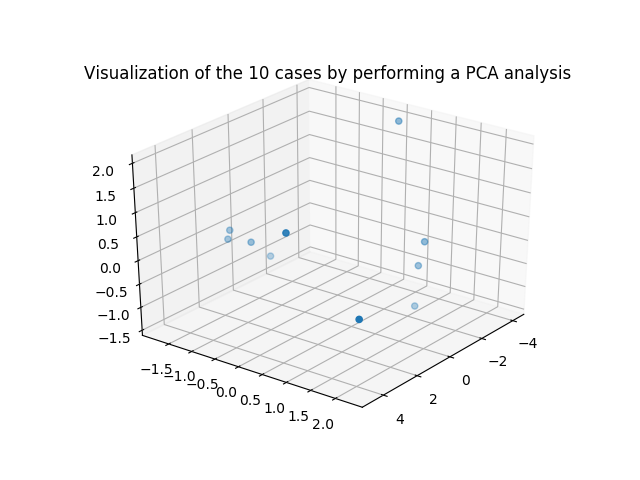

In [463]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(principalDf.iloc[:,0],principalDf.iloc[:,1],principalDf.iloc[:,2])
ax.set_title('Visualization of the 10 cases by performing a PCA analysis')

In [449]:
se.index[se['A'] > 70].tolist()

[6, 43, 95]

In [451]:
se.index[se['A'] <0.0003].tolist()

[11, 20, 112]

## To identify what went wrong with the prediction of the absolute worse case in the Test set, I take a look at three worst case which are case 95, 43 and 6 in Test set. Also take a look at three best case which are case 112, 20 and 11 in Test set. 

## Below are the three worst cases

In [439]:
U_worst95 = np.zeros(640)
for i in range(640):
    U_worst95[i] = A2[i]*k2(x_test.iloc[95,:],x_train.iloc[i,:])
V_worst95 = pd.DataFrame(U_worst95,columns=['A'])
worst_big_5_95 = abs(V_worst95).sort_values(ascending = False, by = ['A'])
worst_big_5_95.index[worst_big_5_95['A'] > 8624].tolist()

[131, 632, 528, 250, 629]

In [427]:
U_worst43 = np.zeros(640)
for i in range(640):
    U_worst43[i] = A2[i]*k2(x_test.iloc[43,:],x_train.iloc[i,:])
V_worst43 = pd.DataFrame(U_worst43,columns=['A'])
worst_big_5_43 = abs(V_worst43).sort_values(ascending = False, by = ['A'])
worst_big_5_43.index[worst_big_5_43['A'] > 11000].tolist()

[131, 632, 239, 528, 200]

In [438]:
U_worst6 = np.zeros(640)
for i in range(640):
    U_worst6[i] = A2[i]*k2(x_test.iloc[6,:],x_train.iloc[i,:])
V_worst6 = pd.DataFrame(U_worst6,columns=['A'])
worst_big_5_6 = abs(V_worst6).sort_values(ascending = False, by = ['A'])
worst_big_5_6.index[worst_big_5_6['A'] > 6600].tolist()

[632, 351, 528, 131, 323]

## case 632,131 and 528 in the prediction fuction, which is influence by the corresponding cases in the training set, make a great impact on the performance. Because the three numbers are all appear in the three list.

## Below are the three best cases

In [441]:
U_best112 = np.zeros(640)
for i in range(640):
    U_best112[i] = A2[i]*k2(x_test.iloc[112,:],x_train.iloc[i,:])
V_best112 = pd.DataFrame(U_best112,columns=['A'])
best_big_5_112 = abs(V_best112).sort_values(ascending = False, by = ['A'])
best_big_5_112.index[best_big_5_112['A'] > 4204].tolist()

[214, 507, 191, 147, 299]

In [447]:
U_best20 = np.zeros(640)
for i in range(640):
    U_best20[i] = A2[i]*k2(x_test.iloc[20,:],x_train.iloc[i,:])
V_best20 = pd.DataFrame(U_best20,columns=['A'])
best_big_5_20 = abs(V_best20).sort_values(ascending = False, by = ['A'])
best_big_5_20.index[best_big_5_20['A'] > 6300].tolist()

[632, 528, 131, 613, 186]

In [448]:
U_best11 = np.zeros(640)
for i in range(640):
    U_best11[i] = A2[i]*k2(x_test.iloc[11,:],x_train.iloc[i,:])
V_best11 = pd.DataFrame(U_best11,columns=['A'])
best_big_5_11 = abs(V_best11).sort_values(ascending = False, by = ['A'])
best_big_5_11.index[best_big_5_11['A'] > 6300].tolist()

[632, 528, 99, 131, 186]

## We can conclude that case 632, 131 and 528 in the prediction fuction, which is influence by the corresponding cases in the training set, maybe are the reason that makes the prediction went wrong. Because the three cases are also appear in the two of the three list in the best cases. These three cases dominate the value of the prediction.

# Part 4: Analysis of the best predicting formula pred(x)

<IPython.core.display.Javascript object>


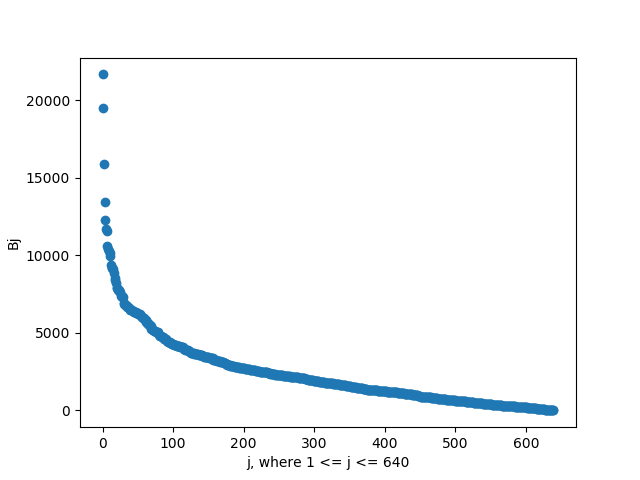

In [465]:
B = -np.sort(-abs(A2))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(m,B)
ax.set_xlabel('j, where 1 <= j <= 640')
ax.set_ylabel('Bj')

In [366]:
totalb = 0
b = np.zeros(640)
zb = 0
for i in range(640):
    totalb += B[i]
for i in range(640):
    zb += B[i]
    b[i] = zb/totalb

<IPython.core.display.Javascript object>


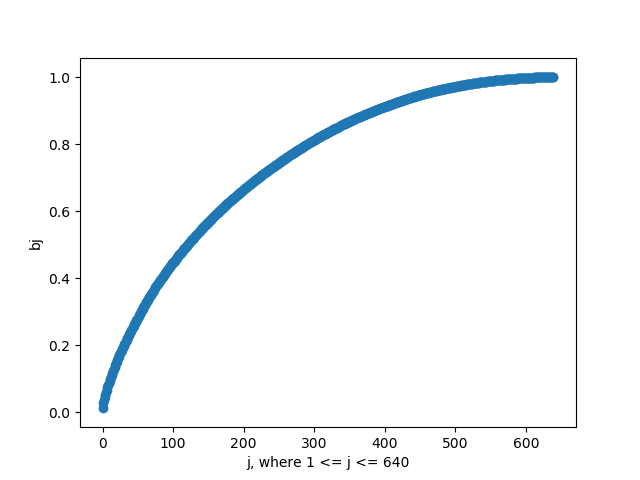

In [466]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(m,b)
ax.set_xlabel('j, where 1 <= j <= 640')
ax.set_ylabel('bj')

In [467]:
i = 0
while b[i] < 0.99:
    i += 1
thr = B[i]
print('The Threshold value:\n',thr)

The Threshold value:
 367.99075467


In [469]:
A3 = np.zeros(640)
for i in range(640):
    if abs(A2[i]) > thr:
        A3[i] = A2[i]
    else:
        A3[i] = 0
print('The new list of fixed value AAi:\n',A3)

The new list of fixed value AAi:
 [   518.2693329   -1710.05831409   4182.81299165  -3476.40263916
   1745.1079821   -6850.09777017   2527.48893636      0.           1939.23840084
  -2069.42771273  -2110.54753249   2332.78249989   2942.33177498
   2763.82375838   2791.62077356      0.          -1972.70948772
  -2895.46075672  -1631.31732967  -5933.40714189      0.            426.24017632
  -1224.65297579   1342.42065916    633.30546341   -742.57032945
    759.66380982   -404.90383885   1532.66641863  10157.37607235
   -961.93880521  -2031.76543689   -720.11538233   2603.0766803
   -382.59335757      0.           2267.61384201  -1869.11473787
  -2814.65515361  -2851.47459035   1674.02381831      0.           1696.34412811
  -1546.67066437   1198.32637399  -2816.77485514   5160.15418209
   1006.60581378      0.              0.          -3708.08922625
  -1599.78750635    616.73641664  -3868.90518053   1219.46584038      0.
   1418.40362314   -448.32700927   1444.73546927   1307.06252802
 

In [373]:
def pred3(x):
    z = 0
    for i in range(640):
        z += A3[i]*k2(x,x_train.iloc[i,:])
    return z
se_train3 = 0
for i in range(640):
    se_train3 += (y_train.iloc[i] - pred3(x_train.iloc[i,:]))**2
rmse_train3 = math.sqrt(se_train3/640)
print('The value of improved RMSE in Q4 on Training set:\n',rmse_train3)
se_test3 = 0
for i in range(161):
    se_test3 += (y_test.iloc[i] - pred3(x_test.iloc[i,:]))**2
rmse_test3 = math.sqrt(se_test3/161)
print('The value of improved RMSE in Q4 on Test set:\n',rmse_test3)
print('The improved relative RMSE ratio in Q4 of Training set:\n',rmse_train3/avy)
print('The improved relative RMSE ratio in Q4 of Test set:\n',rmse_test3/avy)  

The value of improved RMSE in Q4 on Training set:
 848.9576540336199
The value of improved RMSE in Q4 on Test set:
 848.8871094565674
The improved relative RMSE ratio in Q4 of Training set:
 4.917836144253559
The improved relative RMSE ratio in Q4 of Test set:
 4.917427494105744


## Interpretation of the result: It seems something went wrong during this process cause the RMSE ratios are all bigger than 1. However, we still can see that Training set RMSE ratio is closer to Test set RMSE ratio in this process.

# Part 5: Implement KRR using a pre existing function

In [474]:
krr = KernelRidge(kernel = 'rbf',alpha=0.0005,gamma = 0.0001,degree = 1, coef0 = 0)
krr.fit(x_train, y_train)

KernelRidge(alpha=0.0005, coef0=0, degree=1, gamma=0.0001, kernel='rbf',
      kernel_params=None)

In [475]:
pred5_train = krr.predict(x_train)
se_train5 = 0
for i in range(640):
    se_train5 += (y_train.iloc[i] - pred5_train[i])**2
rmse_train5 = math.sqrt(se_train5/640)
print('The value of improved RMSE in Q5 on Training set:\n',rmse_train5)

The value of improved RMSE in Q5 on Training set:
 1.7408547766178906


In [478]:
pred5_test = krr.predict(x_test)
se_test5 = 0
for i in range(161):
    se_test5 += (y_test.iloc[i] - pred5_test[i])**2
rmse_test5 = math.sqrt(se_test5/160)
print('The value of improved RMSE in Q5 on Test set:\n',rmse_test5)

The value of improved RMSE in Q5 on Test set:
 2.6454461856683933


In [479]:
print('The improved relative RMSE ratio in Q5 of Training set:\n',rmse_train5/avy)
print('The improved relative RMSE ratio in Q5 of Test set:\n',rmse_test5/avy)

The improved relative RMSE ratio in Q5 of Training set:
 0.010084411750893857
The improved relative RMSE ratio in Q5 of Test set:
 0.015324522734136899


## Got the same result Train RMSE ratio = 0.01 and Test RMSE ratio = 0.015 as I have done in Question 3.